In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition

n_components, n_samples, rs = 2, 100, 4
scatter_kwargs = dict(s=10, color="grey", alpha=0.5)

# initialize PCA/ICA
pca = decomposition.PCA(n_components=n_components, random_state=rs)
ica = decomposition.FastICA(n_components=n_components, whiten="unit-variance", random_state=rs)


**Gaussian data**

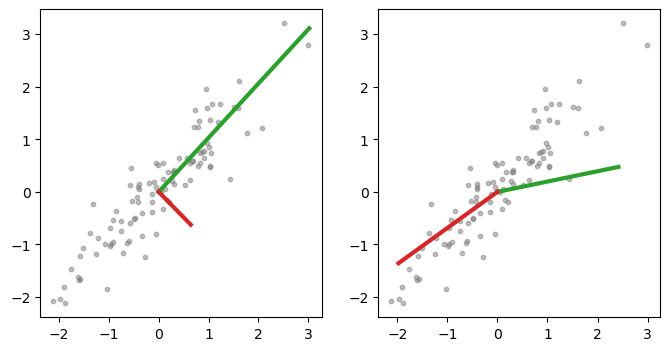

In [2]:
rng = np.random.default_rng(rs)
X = rng.multivariate_normal(mean=[0, 0], cov=[[1, 0.9], [0.9, 1]], size=n_samples)

# initialize plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(X[:, 0], X[:, 1], **scatter_kwargs)
axs[1].scatter(X[:, 0], X[:, 1], **scatter_kwargs)

# PCA - Gaussian data
pca.fit(X)

for idx in range(n_components):
    # scale component by 3*sd
    component = pca.components_.T[:, idx] * np.sqrt(pca.explained_variance_[idx]) * 3
    axs[0].plot([0, component[0]], [0, component[1]], lw=3, color=f"C{idx+2}")


# ICA - Gaussian data
ica.fit(X)

for idx in range(n_components):
    component = ica.components_[:, idx]
    axs[1].plot([0, component[0]], [0, component[1]], lw=3, color=f"C{idx+2}")


**Non-Gaussian data**

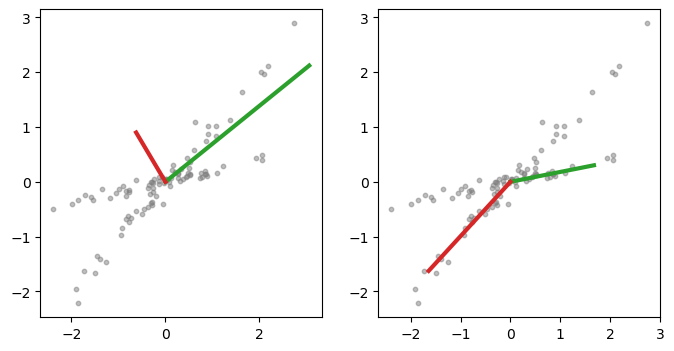

In [3]:
rng = np.random.default_rng(rs - 1)
X0 = rng.multivariate_normal(mean=[0, 0], cov=[[1, 0.99], [0.99, 1]], size=n_samples // 2)
X1 = rng.multivariate_normal(mean=[0, 0], cov=[[1, 0.95], [0.95, 1]], size=n_samples // 2)
X1[:, 1] = X1[:, 1] * 0.2
X = np.concatenate([X0, X1])


# initialize plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(X[:, 0], X[:, 1], **scatter_kwargs)
axs[1].scatter(X[:, 0], X[:, 1], **scatter_kwargs)


# PCA - Non-Gaussian data
pca.fit(X)

for idx in range(n_components):
    # scale component by 3*sd
    component = pca.components_.T[:, idx] * np.sqrt(pca.explained_variance_[idx]) * 3
    axs[0].plot([0, component[0]], [0, component[1]], lw=3, color=f"C{idx+2}")


# ICA - Non-Gaussian data
ica.fit(X)

for idx in range(n_components):
    component = ica.components_[:, idx]
    axs[1].plot([0, component[0]], [0, component[1]], lw=3, color=f"C{idx+2}")
